<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,60.059377,48.727031,96.274933,34.842116,-549.470139,-299.566682,424.538849,-724.105532
1,0.0,1.0,92.192983,92.957937,30.030739,21.133099,1774.190564,2020.505322,504.345626,1516.159696
2,0.0,2.0,22.181556,68.359403,43.377115,28.091392,676.443187,848.452652,407.147752,441.304900
3,0.0,3.0,56.312730,37.303204,72.723964,95.557048,-164.837656,107.059290,44.642955,62.416335
4,0.0,4.0,53.536208,28.079216,23.295870,26.595073,34.707980,176.214346,340.007181,-163.792835
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,61.315744,63.413937,49.933012,37.100095,-684.234107,-462.471319,130.243188,-592.714507
119996,999.0,116.0,82.206475,78.373830,51.264939,51.826452,-281.427247,-7.755551,177.999541,-185.755093
119997,999.0,117.0,55.968471,99.910293,83.335534,27.814220,-9.313237,267.715282,99.635971,168.079310
119998,999.0,118.0,85.286991,45.154227,46.842355,89.403538,-191.943869,84.743241,242.434259,-157.691018


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    60.059377  48.727031  96.274933  34.842116  -549.470139   
      1.0    92.192983  92.957937  30.030739  21.133099  1774.190564   
      2.0    22.181556  68.359403  43.377115  28.091392   676.443187   
      3.0    56.312730  37.303204  72.723964  95.557048  -164.837656   
      4.0    53.536208  28.079216  23.295870  26.595073    34.707980   
...                ...        ...        ...        ...          ...   
999.0 115.0  61.315744  63.413937  49.933012  37.100095  -684.234107   
      116.0  82.206475  78.373830  51.264939  51.826452  -281.427247   
      117.0  55.968471  99.910293  83.335534  27.814220    -9.313237   
      118.0  85.286991  45.154227  46.842355  89.403538  -191.943869   
      119.0  80.618337  26.479741  46.619508  21.955669   305.527526   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -299.566682  424.538849  -724.105532  
      1.0    2020.505322  504.345626  1516.159696  
      2.0     848.452652  407.147752   441.304900  
      3.0     107.059290   44.642955    62.416335  
      4.0     176.214346  340.007181  -163.792835  
...                  ...         ...          ...  
999.0 115.0  -462.471319  130.243188  -592.714507  
      116.0    -7.755551  177.999541  -185.755093  
      117.0   267.715282   99.635971   168.079310  
      118.0    84.743241  242.434259  -157.691018  
      119.0   491.200781  344.734740   146.466041  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    60.059377  48.727031  96.274933  34.842116  -549.470139   
      1.0    92.192983  92.957937  30.030739  21.133099  1774.190564   
      2.0    22.181556  68.359403  43.377115  28.091392   676.443187   
      3.0    56.312730  37.303204  72.723964  95.557048  -164.837656   
      4.0    53.536208  28.079216  23.295870  26.595073    34.707980   
...                ...        ...        ...        ...          ...   
999.0 115.0  61.315744  63.413937  49.933012  37.100095  -684.234107   
      116.0  82.206475  78.373830  51.264939  51.826452  -281.427247   
      117.0  55.968471  99.910293  83.335534  27.814220    -9.313237   
      118.0  85.286991  45.154227  46.842355  89.403538  -191.943869   
      119.0  80.618337  26.479741  46.619508  21.955669   305.527526   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -299.566682  424.538849  -724.105532  
      1.0    2020.505322  504.345626  1516.159696  
      2.0     848.452652  407.147752   441.304900  
      3.0     107.059290   44.642955    62.416335  
      4.0     176.214346  340.007181  -163.792835  
...                  ...         ...          ...  
999.0 115.0  -462.471319  130.243188  -592.714507  
      116.0    -7.755551  177.999541  -185.755093  
      117.0   267.715282   99.635971   168.079310  
      118.0    84.743241  242.434259  -157.691018  
      119.0   491.200781  344.734740   146.466041  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,60.059377,48.727031,96.274933,34.842116,-549.470139,-299.566682,424.538849,-724.105532
1,0.0,1.0,92.192983,92.957937,30.030739,21.133099,1774.190564,2020.505322,504.345626,1516.159696
2,0.0,2.0,22.181556,68.359403,43.377115,28.091392,676.443187,848.452652,407.147752,441.304900
3,0.0,3.0,56.312730,37.303204,72.723964,95.557048,-164.837656,107.059290,44.642955,62.416335
4,0.0,4.0,53.536208,28.079216,23.295870,26.595073,34.707980,176.214346,340.007181,-163.792835
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,61.315744,63.413937,49.933012,37.100095,-684.234107,-462.471319,130.243188,-592.714507
119996,999.0,116.0,82.206475,78.373830,51.264939,51.826452,-281.427247,-7.755551,177.999541,-185.755093
119997,999.0,117.0,55.968471,99.910293,83.335534,27.814220,-9.313237,267.715282,99.635971,168.079310
119998,999.0,118.0,85.286991,45.154227,46.842355,89.403538,-191.943869,84.743241,242.434259,-157.691018


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    60.059377  48.727031  96.274933  34.842116  -549.470139   
      1.0    92.192983  92.957937  30.030739  21.133099  1774.190564   
      2.0    22.181556  68.359403  43.377115  28.091392   676.443187   
      3.0    56.312730  37.303204  72.723964  95.557048  -164.837656   
      4.0    53.536208  28.079216  23.295870  26.595073    34.707980   
...                ...        ...        ...        ...          ...   
999.0 115.0  61.315744  63.413937  49.933012  37.100095  -684.234107   
      116.0  82.206475  78.373830  51.264939  51.826452  -281.427247   
      117.0  55.968471  99.910293  83.335534  27.814220    -9.313237   
      118.0  85.286991  45.154227  46.842355  89.403538  -191.943869   
      119.0  80.618337  26.479741  46.619508  21.955669   305.527526   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -299.566682  424.538849  -724.105532  
      1.0    2020.505322  504.345626  1516.159696  
      2.0     848.452652  407.147752   441.304900  
      3.0     107.059290   44.642955    62.416335  
      4.0     176.214346  340.007181  -163.792835  
...                  ...         ...          ...  
999.0 115.0  -462.471319  130.243188  -592.714507  
      116.0    -7.755551  177.999541  -185.755093  
      117.0   267.715282   99.635971   168.079310  
      118.0    84.743241  242.434259  -157.691018  
      119.0   491.200781  344.734740   146.466041  

[120000 rows x 8 columns]

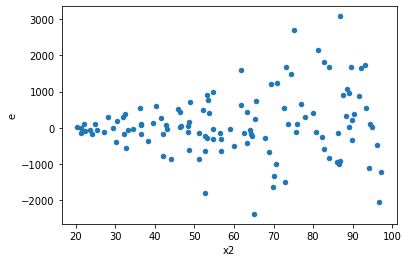

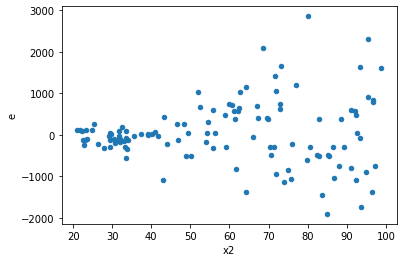

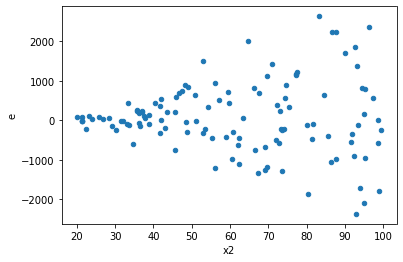

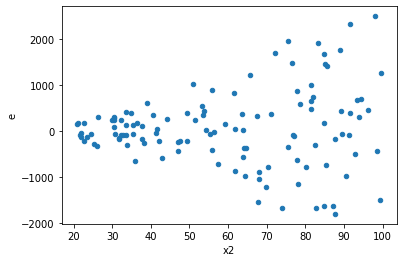

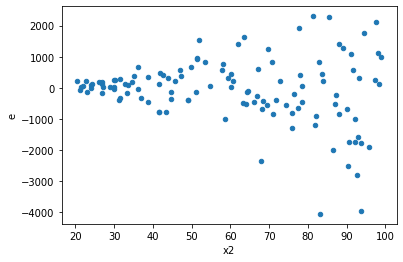

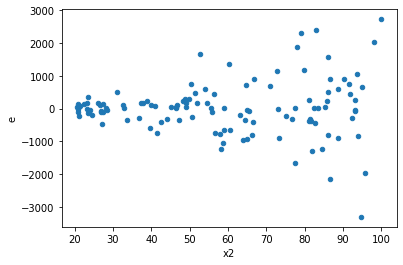

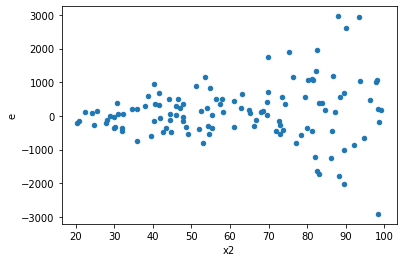

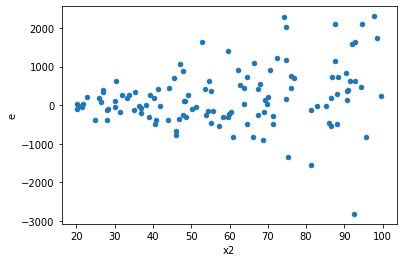

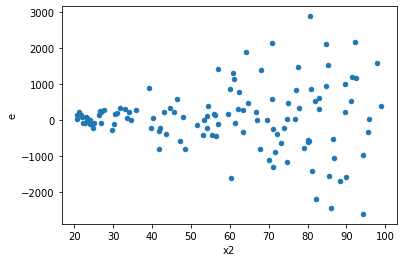

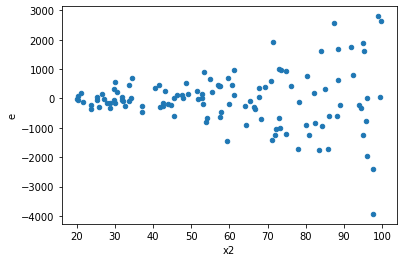

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,58.0,54.0,40827932.00143505,39207479.17692334,703929.8620937078,726064.4292022841,1.0314442791825043,0.9107944963678047,0.5446027518160976,0.45539724818390237,Reject005=1 : Homoscedasticity
5.0,47.0,65.0,10837213.437650386,50608300.93378631,230579.00931171034,778589.245135174,3.3766700943824035,6.825318331848962e-06,0.9999965873408341,3.412659165924481e-06,Reject005=0 : Heteroscedasticity
6.0,49.0,63.0,11136203.09155366,63136405.29573858,227269.45084803388,1002165.1634244219,4.409590288905702,5.850625028891443e-08,0.9999999707468749,2.9253125144457215e-08,Reject005=0 : Heteroscedasticity
7.0,49.0,63.0,29217719.74847992,48466809.123017296,596279.9948669372,769314.430524084,1.2901899059950188,0.33876130679841854,0.8306193466007907,0.16938065339920927,Reject005=1 : Homoscedasticity
9.0,63.0,49.0,24396643.533796784,54281122.298188515,387248.3100602664,1107778.0060854799,2.8606400010191892,0.0002042407755182829,0.9998978796122409,0.00010212038775914145,Reject005=0 : Heteroscedasticity
12.0,60.0,52.0,43102922.18062362,45881753.69032359,718382.036343727,882341.4171216076,1.2282342437352238,0.45031200354377043,0.7748439982281148,0.22515600177188522,Reject005=1 : Homoscedasticity
14.0,59.0,53.0,33223723.86269387,87471771.57435326,563113.9637744724,1650410.7844217597,2.9308646039591917,0.00010876952469751622,0.9999456152376512,5.438476234875811e-05,Reject005=0 : Heteroscedasticity
15.0,52.0,60.0,16197262.519054614,62020349.69893041,311485.8176741272,1033672.4949821735,3.3185218598414314,1.0904217843554775e-05,0.9999945478910782,5.452108921777388e-06,Reject005=0 : Heteroscedasticity
19.0,63.0,49.0,41187100.321181476,45913122.87333206,653763.4971616108,937002.5076190217,1.4332438438168016,0.19165943784414696,0.9041702810779265,0.09582971892207348,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,54.0,58.0,50708051.1820347,31711142.137396153,939037.9848524944,546743.8299551061,0.5822382467744257,0.04637486434442677,Reject005=0 : Heteroscedasticity
1.0,68.0,44.0,41309386.54297894,12515896.143713653,607490.9785732197,284452.1850844012,0.4682410029404523,0.00475681123591627,Reject005=0 : Heteroscedasticity
2.0,48.0,64.0,48248328.789624564,30149427.46361896,1005173.5164505118,471084.80411904625,0.4686601829528399,0.0068895583278687994,Reject005=0 : Heteroscedasticity
3.0,69.0,43.0,67768812.89295727,12146019.554471372,982156.7085935837,282465.57103421795,0.28759725262040864,3.9806941331191314e-06,Reject005=0 : Heteroscedasticity
4.0,58.0,54.0,40827932.00143505,39207479.17692334,703929.8620937078,726064.4292022841,1.0314442791825043,0.9107944963678047,Reject005=1 : Homoscedasticity
5.0,47.0,65.0,10837213.437650386,50608300.93378631,230579.00931171034,778589.245135174,3.3766700943824035,6.825318331848962e-06,Reject005=0 : Heteroscedasticity
6.0,49.0,63.0,11136203.09155366,63136405.29573858,227269.45084803388,1002165.1634244219,4.409590288905702,5.850625028891443e-08,Reject005=0 : Heteroscedasticity
7.0,49.0,63.0,29217719.74847992,48466809.123017296,596279.9948669372,769314.430524084,1.2901899059950188,0.33876130679841854,Reject005=1 : Homoscedasticity
8.0,39.0,73.0,27944611.06251016,43879339.9058847,716528.4887823118,601086.8480258178,0.8388875773066906,0.555793451028516,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    596
Reject005=1 : Homoscedasticity      404
Name: Result_test, dtype: int64